In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

%matplotlib inline

For this ML project we will be using the White Wine quality dataset.

In [9]:
df = pd.read_csv('winequality-white.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
#Check the info, data type of each feature in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [11]:
# Checking number of rows and columns in our data:
df.shape

(4898, 12)

In [12]:
# describe gives statistical analysis of your data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Analyzing and processing wine data:

In [13]:
#Checking for missing values
null = df.isnull().sum()
print(null)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Lets Plot distribution for each variable using Seaborn.

In [14]:
#Enlist the features present in the dataset
feature_names = df.columns.tolist()
print(feature_names)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

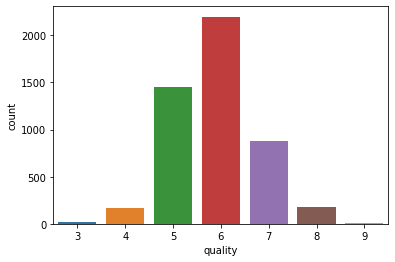

In [15]:
sns.countplot(df['quality'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

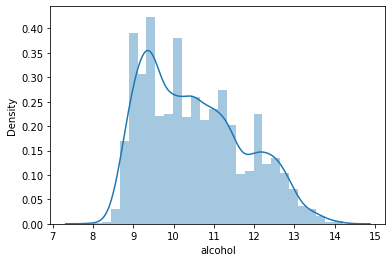

In [16]:
sns.distplot(df['alcohol'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

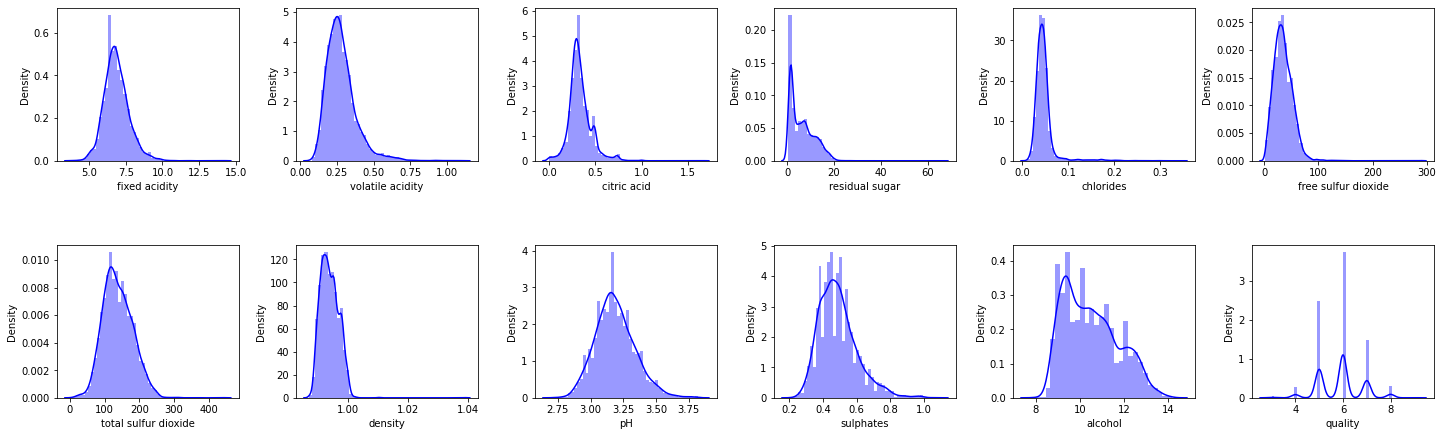

In [17]:
#Lets create Distribution plot of all the features:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,6))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, color='blue', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Analyzing the correlation between the variables. We use sns.heatmap for this purpose.

<AxesSubplot:>

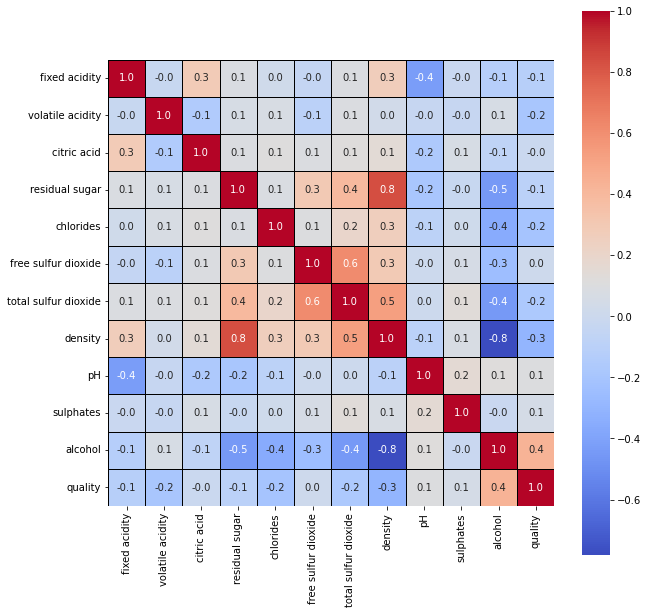

In [18]:
# Lets build a heat map to understand the correlation between the columns in our dataset
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square = True, fmt= '.1f', annot = True, cmap="coolwarm", linewidths=1, linecolor='black')

Heatmap Analysis:
The colourbar represents how closely two columns are related to each other. 
In this case darker the colour closer the values are to each other 
**i.e** there is POSTIVE correlation

Negative values (Below 0): Values are negatively correlated

Seaborn.catplot:
This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying axes-level function to use:

<AxesSubplot:>

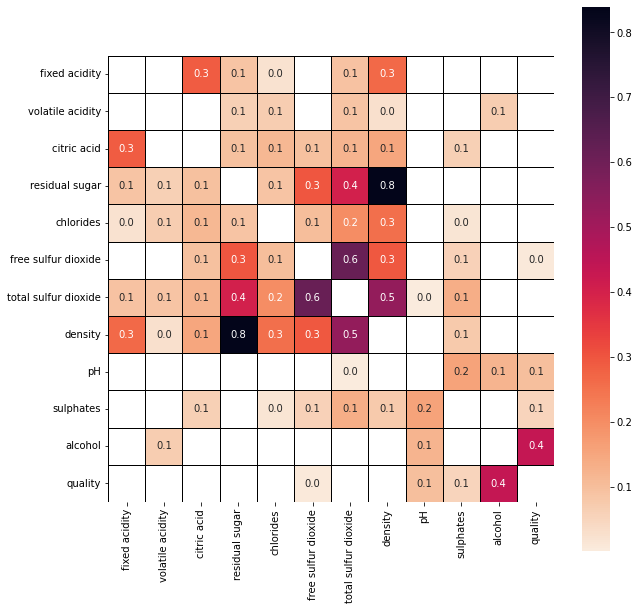

In [19]:
# Lets focus on columns which seem to be positively correlated [above a threshold value]
cor1 = corr[(corr >= 0) & (corr < 1.0)]
plt.figure(figsize=(10,10))
sns.heatmap(cor1, cbar=True, square = True, fmt= '.1f', annot = True, cmap="rocket_r", linewidths=1, linecolor='black')

From the above heatmap it is evident that white wine quality has a strong positvie correlation with alcohol
and positve relation with sulphates and pH level.

Quality has nothing to do with **free sO2 content**.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

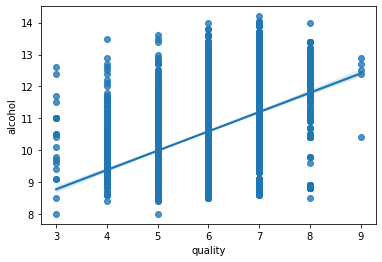

In [20]:
# Lets confirm our findings with regression plots
sns.regplot(x="quality", y="alcohol", data=df)

Wine quality has a positive correlation with alcohol content

## Now Lets focus on columns which seem to be negatively correlated.


<AxesSubplot:>

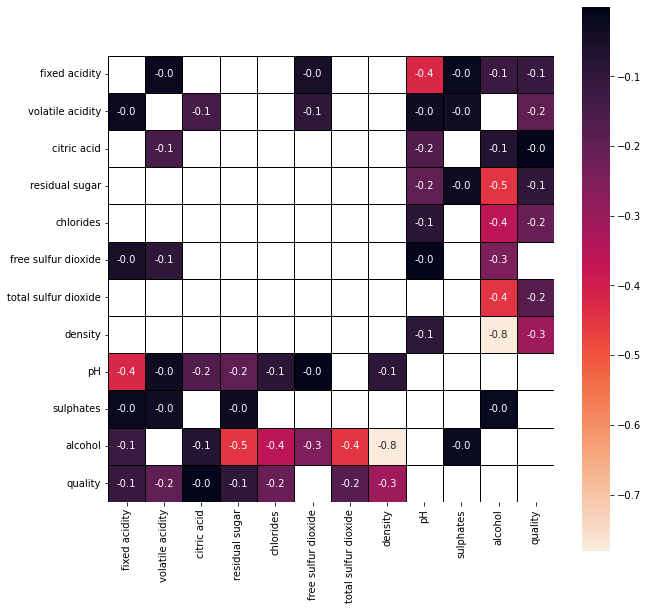

In [21]:
cor2 = corr[(corr >= -1.0) & (corr < 0)]
plt.figure(figsize=(10,10))
sns.heatmap(cor2, cbar=True, square = True, fmt= '.1f', annot = True, cmap="rocket_r", linewidths=1, linecolor='black')

It seems that quality is negatively related with volatile acidity, density,chlorides and total s02 levels.

<AxesSubplot:xlabel='density', ylabel='quality'>

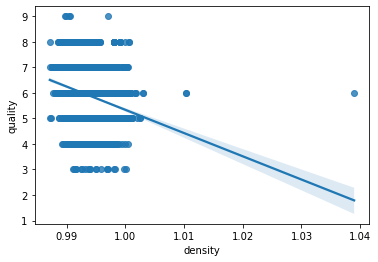

In [22]:
sns.regplot(x="density", y="quality", data=df)

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

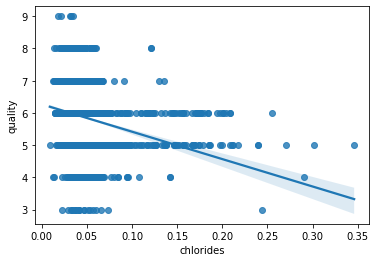

In [23]:
sns.regplot(x="chlorides", y="quality", data=df)

## Analysis summary:
-
-
-

Data analysis is done
Now we move to:

## Data Preprocessing

Separate data and your target variable (label) i.e Quality column

In [24]:
# axis = 1 for dropping col and axis = 0 for dropping row
X = df.drop('quality', axis = 1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

## Label binarisation/Label encoding: 
If quality >= 7 then good otherwise bad

In [25]:
Y = df['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: quality, Length: 4898, dtype: int64


## Train and test split

In [26]:
# Need to make 4 variables
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

1) **0.2** means 20% of original data = Test data and rest 80% is training data


2) If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

However, if a fixed value is assigned like random_state = 0 or 1 or 42 or any other integer then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.


In [27]:
print(Y.shape, Y_train.shape, Y_test.shape)

(4898,) (3918,) (980,)


4898 values in original dataset
3918 values used for training 
980 values used for testing the model

## Model Training

1) **Random forest classifier**

In [28]:
model = RandomForestClassifier()

In [29]:
model.fit(X_train,Y_train)

RandomForestClassifier()

Model Evaluation

In [30]:
# accuracy on test data:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print(accuracy_score(Y_test, X_test_prediction)* 100)

88.77551020408163


In [31]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       774
           1       0.84      0.57      0.68       206

    accuracy                           0.89       980
   macro avg       0.87      0.77      0.81       980
weighted avg       0.88      0.89      0.88       980



2) **Support Vector Machine (SVM)**

In [32]:
#import svc
from sklearn.svm import SVC

#Store SVC in a variable for use 
model2 = SVC()

#Fit data in your model vairiable
model2.fit(X_train, Y_train)

SVC()

In [33]:
prediction1 = model2.predict(X_test)
accuracy = print(accuracy_score(Y_test, prediction1)* 100)

78.9795918367347


In [34]:
# Detailed classification Report for SVM Algo:
print(classification_report(Y_test, prediction1))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       774
           1       0.00      0.00      0.00       206

    accuracy                           0.79       980
   macro avg       0.39      0.50      0.44       980
weighted avg       0.62      0.79      0.70       980



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3) **Logistic Regression**:

In [35]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
prediction3 = reg.predict(X_test)
accuracy = print(accuracy_score(Y_test,prediction3)*100)

79.38775510204081


In [40]:
print(classification_report(Y_test, prediction3))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       774
           1       0.52      0.21      0.30       206

    accuracy                           0.79       980
   macro avg       0.67      0.58      0.59       980
weighted avg       0.76      0.79      0.76       980



3) **XGBoost**

In [37]:
import xgboost as xgb
model3 = xgb.XGBClassifier(random_state=1)
model3.fit(X_train, Y_train)

XGBClassifier(random_state=1)

In [38]:
prediction2 = model3.predict(X_test)
print(accuracy_score(Y_test, prediction2)* 100)

83.26530612244898


In [39]:
print(classification_report(Y_test, prediction2))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       774
           1       0.66      0.42      0.51       206

    accuracy                           0.83       980
   macro avg       0.76      0.68      0.71       980
weighted avg       0.82      0.83      0.82       980



- **Random Forest**: Generated predictions for wine quality with an accuracy of 88.57%.

- **SVM**: The SVM algorithm achieves an accuracy of 80%.

- **Logistic Regression**: Acheives an accuracy of 79.38%.

- **XGBoost**: XGBoost prediction algorithm acheived a prediction accuracy of 83.27%. 
